In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/premier-league/stats.csv
/kaggle/input/premier-league/results.csv


In [3]:
results_df = pd.read_csv('/kaggle/input/premier-league/results.csv')
stats_df = pd.read_csv('/kaggle/input/premier-league/stats.csv')

In [4]:
results_df.head()

,home_team,away_team,home_goals,away_goals,result,season
0,Sheffield United,Liverpool,1.0,1.0,D,2006-2007
1,Arsenal,Aston Villa,1.0,1.0,D,2006-2007
2,Everton,Watford,2.0,1.0,H,2006-2007
3,Newcastle United,Wigan Athletic,2.0,1.0,H,2006-2007
4,Portsmouth,Blackburn Rovers,3.0,0.0,H,2006-2007


In [5]:
stats_df.head()

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,...,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season
0,Manchester United,28.0,5.0,83.0,60.0,1.0,698.0,256.0,21.0,12.0,...,918.0,258.0,25686.0,NaN,1.0,NaN,2.0,37.0,25.0,2006-2007
1,Chelsea,24.0,3.0,64.0,62.0,4.0,636.0,216.0,14.0,16.0,...,897.0,231.0,24010.0,NaN,2.0,NaN,1.0,74.0,22.0,2006-2007
2,Liverpool,20.0,10.0,57.0,44.0,0.0,668.0,214.0,15.0,8.0,...,1107.0,282.0,24150.0,NaN,1.0,NaN,0.0,51.0,27.0,2006-2007
3,Arsenal,19.0,8.0,63.0,59.0,3.0,638.0,226.0,19.0,10.0,...,873.0,278.0,25592.0,NaN,1.0,NaN,0.0,88.0,27.0,2006-2007
4,Tottenham Hotspur,17.0,12.0,57.0,48.0,3.0,520.0,184.0,6.0,5.0,...,796.0,181.0,22200.0,NaN,2.0,NaN,0.0,51.0,24.0,2006-2007


In [6]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4560 entries, 0 to 4559
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   home_team   4560 non-null   object 
 1   away_team   4560 non-null   object 
 2   home_goals  4560 non-null   float64
 3   away_goals  4560 non-null   float64
 4   result      4560 non-null   object 
 5   season      4560 non-null   object 
dtypes: float64(2), object(4)
memory usage: 213.9+ KB


In [7]:
results_df['total_goals'] = results_df.home_goals + results_df.away_goals

In [8]:
print('Average goal per match is ',results_df['total_goals'].mean())

Average goal per match is  2.6875


In [9]:
results_df.season.value_counts()

season
2006-2007    380
2007-2008    380
2008-2009    380
2009-2010    380
2010-2011    380
2011-2012    380
2012-2013    380
2013-2014    380
2014-2015    380
2015-2016    380
2016-2017    380
2017-2018    380
Name: count, dtype: int64

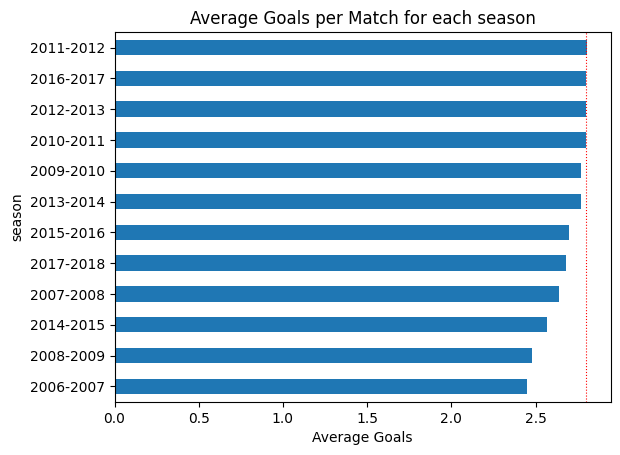

In [10]:
results_df.groupby('season')['total_goals'].mean().sort_values().plot(kind='barh', title='Average Goals per Match for each season', xlabel='Average Goals')
plt.axvline(2.8, linestyle=':', linewidth=.8, color='red')

<Axes: title={'center': 'Chelsea has the most total Away wins'}, xlabel='Away Wins', ylabel='away_team'>

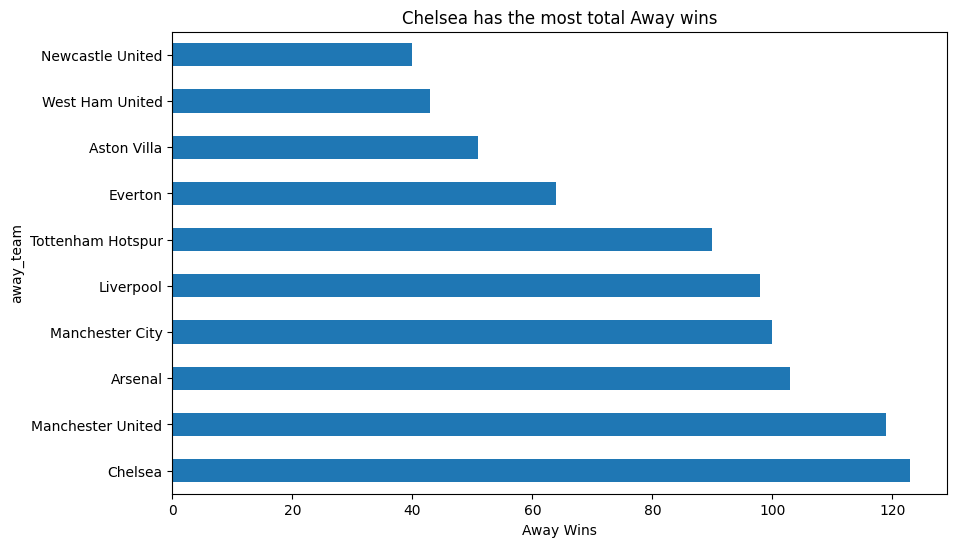

In [11]:
results_df.loc[results_df.result=='A','away_team'].value_counts().iloc[:10].plot(kind='barh', figsize=(10,6), xlabel='Away Wins', title='Chelsea has the most total Away wins')

In [12]:
teams = results_df.home_team.unique()

In [13]:
#Season and team with the highest average touches
stats_df.groupby(['season','team'])['touches'].agg('mean').idxmax()

('2017-2018', 'Manchester City')

In [16]:
maxes = stats_df.groupby('season')['touches'].transform(max)
stats_df.loc[stats_df.touches==maxes,['team','season']]
#Teams with the most touches each season.

,team,season
0,Manchester United,2006-2007
22,Arsenal,2007-2008
40,Manchester United,2008-2009
62,Arsenal,2009-2010
83,Arsenal,2010-2011
100,Manchester City,2011-2012
123,Arsenal,2012-2013
143,Arsenal,2013-2014
161,Manchester City,2014-2015
181,Arsenal,2015-2016


In [17]:
results_df.columns

Index(['home_team', 'away_team', 'home_goals', 'away_goals', 'result',
       'season', 'total_goals'],
      dtype='object')

In [18]:
results_df.loc[results_df.home_goals>results_df.away_goals,'result']='H'
results_df.loc[results_df.home_goals<results_df.away_goals,'result']='A'
results_df.loc[results_df.home_goals==results_df.away_goals,'result']='D'

In [19]:
results_df.result.value_counts()

result
H    2108
A    1288
D    1164
Name: count, dtype: int64

In [20]:
#Team with the most away wins
results_df.loc[results_df.result=='A','away_team'].value_counts().idxmax()

'Chelsea'

In [21]:
#Team with the most home wins
results_df.loc[results_df.result=='H','home_team'].value_counts().idxmax()

'Manchester United'

In [22]:
#Team with the most home goals
results_df.groupby('home_team')['home_goals'].sum().idxmax()

'Manchester City'

In [23]:
#Team with the most away goals
results_df.groupby('away_team')['away_goals'].sum().idxmax()

'Arsenal'

In [27]:
#Home team that conceded the most goals
results_df.groupby('home_team')['away_goals'].sum().sort_values().reset_index().iloc[-1]

home_team     West Ham United
away_goals              281.0
Name: 38, dtype: object

In [28]:
#Away team that conceded the most goals
results_df.groupby('away_team')['home_goals'].sum().sort_values().reset_index().iloc[-1]

away_team     West Ham United
home_goals              343.0
Name: 38, dtype: object

In [32]:
#Team with the best home-goals to away-goals ratio
results_df['ratio'] = results_df['home_goals']/results_df['away_goals']
max_ratio = results_df.groupby('season')['ratio'].transform(max)
results_df.loc[results_df.ratio==max_ratio,['home_team','season']]

,home_team,season
4,Portsmouth,2006-2007
7,Bolton Wanderers,2006-2007
9,Chelsea,2006-2007
11,Tottenham Hotspur,2006-2007
19,Charlton Athletic,2006-2007
...,...,...
4548,Tottenham Hotspur,2017-2018
4551,Crystal Palace,2017-2018
4553,Liverpool,2017-2018
4554,Manchester United,2017-2018


In [33]:
max_ratio_season = results_df.loc[results_df.ratio==max_ratio,['home_team','season']]

In [36]:
max_ratio_season.drop_duplicates('season',keep='first').set_index('season')

,home_team
season,
2006-2007,Portsmouth
2007-2008,Sunderland
2008-2009,Arsenal
2009-2010,Stoke City
2010-2011,Aston Villa
2011-2012,Manchester City
2012-2013,Fulham
2013-2014,Liverpool
2014-2015,Chelsea


In [37]:
stats_df.head()

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,...,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season
0,Manchester United,28.0,5.0,83.0,60.0,1.0,698.0,256.0,21.0,12.0,...,918.0,258.0,25686.0,NaN,1.0,NaN,2.0,37.0,25.0,2006-2007
1,Chelsea,24.0,3.0,64.0,62.0,4.0,636.0,216.0,14.0,16.0,...,897.0,231.0,24010.0,NaN,2.0,NaN,1.0,74.0,22.0,2006-2007
2,Liverpool,20.0,10.0,57.0,44.0,0.0,668.0,214.0,15.0,8.0,...,1107.0,282.0,24150.0,NaN,1.0,NaN,0.0,51.0,27.0,2006-2007
3,Arsenal,19.0,8.0,63.0,59.0,3.0,638.0,226.0,19.0,10.0,...,873.0,278.0,25592.0,NaN,1.0,NaN,0.0,88.0,27.0,2006-2007
4,Tottenham Hotspur,17.0,12.0,57.0,48.0,3.0,520.0,184.0,6.0,5.0,...,796.0,181.0,22200.0,NaN,2.0,NaN,0.0,51.0,24.0,2006-2007


In [39]:
#Team with most yellow cards
stats_df.loc[stats_df.total_yel_card==stats_df.total_yel_card.max(),['team','total_yel_card']]

,team,total_yel_card
179,Sunderland,94.0


In [40]:
#Team with most red cards
stats_df.loc[stats_df.total_red_card==stats_df.total_red_card.max(),['team','total_red_card']]

,team,total_red_card
72,Sunderland,9.0
116,Queens Park Rangers,9.0


In [41]:
#Team with the most penalty saves
stats_df.loc[stats_df.penalty_save==stats_df.penalty_save.max(),['team','penalty_save']]

,team,penalty_save
7,Blackburn Rovers,5.0


In [42]:
#Team with the most corners
stats_df.loc[stats_df.corner_taken==stats_df.corner_taken.max(),['team','corner_taken']]

,team,corner_taken
108,Liverpool,309.0
